## Building a Machine Learning Classification Model to Predict Customer Churn

+ **Student:** Wambui Munene
+ **Student pace:** DSPT08
+ **Scheduled project review date/time:** 23/12/2024 23.59 Hours
+ **Instructor name:** Samuel Karu

### Introduction

The telco industry is highly competitive with multiple players within any given jurisdiction. Acquiring new customers involves huge marketing costs, that include huge advertising budgets and commissions to sales agents. It therefore becomes imperative to retain those customers once they are acquired. Churn which refers to the number of customers who cease doing business with a company within a given period, is a closely watched metric in the telco industry. It is the motivation of every telco company to understand the features or characteristics of a customer who is likely to 'churn'. With this understanding, the company can get ahead of the problem, and develop initiatives that target these specific customers , to discourage them from ceasing doing business with the company.

In this project, I will use a dataset provided by SyriaTel that is avialble on https://www.kaggle.com/ that details various call patterns and spend of customers as well as their locations https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset .

Using this data set I will:
+ Examine the features and using industry domain knowledge select the features to use in my predictive model.
+ Using these features build a classifier model to predict whether a customer will stop doing business with SyriaTel.
+ Based on the model metrics, determine if these features have any predictive patterns.
+ If the features indeed have predictive patterns, provide SyriaTel with the most optimal version of the model to test new (unseen)customer data and identify those customers that are most likely to churn.
+ The company will then use this predicted data to make pro-actice startegies to retain these 'at risk' customers.


### Problem Statement
SyriaTel is intentional about reducing the high cost of customer churn. They have hired me to develop a classification model that is able to a higher degree, predict if a customer is likely to churn i.e. terminate their contract. They have provided me with a historical dataset of customers' call and spend characteristics and whether or not they left the network after a period of time. With this model, their Marketing and Revenue Assurance departments will be able to test future customers data to predict the likelihood of a customer leaving the network. With these predictions, they will be able to develop retention startegies specifically targeted to these customers to discourage them from leaving.


    
 ### Business Objectives
 + **Goal:**
     + Train a classification model using the provided historical data to determine if and what features are useful in predicting churn.
 + **Specific Objectives:**
     + Determine if the data provided has any predictive power on the target (churn) using Logistic regression or Decision trees (or both)
     + Through model optimization, identify the features that have the best predictive power 
     + Use the most optimal model on future customers data to predict "at risk" customers
     + Provide insights on factors affecting customer churn and **suggest** 'data supported' remedies.
     
     
 

### 1. 0 Industry Background

The SyriaTel data set consist of fairly straightforward and well formated data. It has critical customer usage (minutes/number of calls) as well as customer choices of premium services columns. Based on **industry standards** the following features from the data set are commonly associated with customer churn and will be considered as model features that have an impact on the traget variable 'churn'.

**Usage Patterns:** 'total day minutes', 'total day calls','total eve calls', 'total eve minutes','total night calls','total night minutes','total intl calls', and 'total intl minutes' are critical columns for determining churn. High usage of calls and minutes can indicate customer engagement and satisfaction, while low usage might suggest dissatisfaction.

**Charges:** 'total day charge','total eve charge','total night charge', and 'total intl charge' are also important columns. Higher charges can lead to customer distasfaction if they feel they are not getting value for money.

**Service Quality:** Features like 'International plan' and 'voice mail plan' can reflect a very high expectation from customers who are enrolled in those plans, and can have a direct impact on satisfaction levels and therefore, churn.

**Customer Support:** 'customer service calls' a high number of customer service calls can indicate issues of service quality or customer dissatisfaction.

**Account Length:** The 'account length' feature is equally important as longer account lengths generally indicate customer loyalty, while shorter account lengths may suggest a higher likelihood of churn.

**Location:** Customer location indicated by the 'state' may have an effect on churn due to unique characteristics within the State like income levels, choice of networks etc, and will be tested early in the modeling to assess it's predictive power.If it is found to be having little or no predictive power, this feature will be dropped as multiple locations included in a model can make it very complex and less effecient.

The following features from the data set are deemed to have little or no predicted power and will be excluded from the model right from the start:

+ 'area code'
+ 'phone number'


### 2.0 Understanding the Dataset

In [1]:
# Import the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Load the data as a DataFrame and display the first 5 columns
df = pd.read_csv('telco_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# check the shape of the data
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 3333 rows
This data set consists of 21 columns


In [4]:
# Get column names
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

The dataset has 21 columns that can be categorized as follows:-
+ **Customer Info:** These clolumns are state, account length(the period when the account has been active), area code, phone number and account length 
* **international plan:** This is a binary column (Yes/No) that indicates whether a customer is enrolled for international calls
+ **voice mail plan:** This is also a binary column (Yes/No) that indicates whether a customer has enrolled into the Voice Mail service
+ **number vmail messages:** This is the number of voice mail messages the customer has received
+ **Minutes Info :** These are the number of  minutes by each customer with different columns for local day, evening,night minutes, as well as total international minutes
+ **Call Info:** These are the number of local calls by each customer with different columns for  into day, evening,and night calls, as well as total international calls
+ **Charges Info:** These are the charges for local calls made by each customer with different columns for day, evening and night charges, as well as total international charges.
+ **customer service calls:** These are the number of calls customers made to customer service
+ **churn:** This is a binary column indicating whether or not a customer left the network service. It is our target column.

In [5]:
# Get column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The target column is boolean. This will be converted to integer. The international plan,voice mail plan and state columns are objects and these will be one-hot encoded to integers prior to modeling. There are no missing values in this dataset.

In [6]:
# Confirming there are no Null values
df.isnull().values.any()

False

In [7]:
# Get statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


+ Average account length in this data set is 101 days which is about 3 months with a maximum of approximately 8 months (243 days).
+ While the average day, evening and night calls is similar at around 100, the average duration (minutes) of evening and night calls is significantly higher than day ; 180 minutes for day and 201 minutes for evening/night calls. This is an expected customer call behaviour as people talk more to friends and family outside of the business day hours. 
+ Also, as per industry standards, tariffs are higher during the day than during the evening and night. The average day charge is 31, while the evening and night is 17 and 9 respectively. This could also explain the longer calls in the evening and night hours.
+ The mean for international minutes, calls and charges appear to be low; The minimum is 0: This is because only a few customers enroll for this service as it is a premium service. 
+ The mean number of voice mail messages is higher than the number of international calls because more people enroll for this service. The minimum is also 0 because not all customers opt into this service.
+ The number of calls to customer service are surprisingly low in this network. Average of 1.5 calls with a minimum of 1 and a maximum of 9. This could be due to a generally good service offering by the network or the availability of other mechanisms e.g online chat for resolution of customer issues.

In [8]:
# Get statistical summary of the categorical columns
df.describe(include='O').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


+ The 'international plan' and 'voice mail plan' columns are binary columns(Yes/No). As expected, only a few customers have opted into these 2 services.(frequency of 'no').These columns will be One-Hot-Encoded and converted to integers. 
+ There are 51 states, so these will be significant number of feature columns added after one-hot encoding. That is why, it will be imperative to check feature importances early on in the modeling process to check if the states have any significant predictive power. If not, drop the states from the iterative modeling process.

### 2.1 Data Cleaning and Feature Engineering

In this section I will perform the following tasks:
+ Drop columns that are not critical to the model
+ Convert column names to CamelCase for easier readability and display
+ Convert the target column 'churn' from boolean to integer
+ One-Hot Encode the 3 categorical columns 'international plan', 'voice mail plan' and 'state' to numerical.
+ Check for, and remove outliers

In [9]:
# Making a copy of the DataFrame before data cleaning
df1 = df.copy(deep=True)
df1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
# drop unimportant columns
df1 = df1.drop(columns=['phone number','area code'],axis=1)

# Confirm columns are dropped
df1.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [11]:

# Function to capitalize the first letter of each word in column names
def capitalize_columns(df):
    df1.columns = [' '.join(word.capitalize() for word in col.split()) for col in df1.columns]
    return df1

# Apply the function to the DataFrame
df1 = capitalize_columns(df1)
                   
# Confirm each column word is Capitalized.
df1.columns


Index(['State', 'Account Length', 'International Plan', 'Voice Mail Plan',
       'Number Vmail Messages', 'Total Day Minutes', 'Total Day Calls',
       'Total Day Charge', 'Total Eve Minutes', 'Total Eve Calls',
       'Total Eve Charge', 'Total Night Minutes', 'Total Night Calls',
       'Total Night Charge', 'Total Intl Minutes', 'Total Intl Calls',
       'Total Intl Charge', 'Customer Service Calls', 'Churn'],
      dtype='object')

In [12]:
#Function to remove the white spaces from column names
def remove_spaces(df1): 
    df1.columns = [col.replace(' ', '') for col in df1.columns]
    return df1
                   
#Apply the function to the DataFrame 
df1 = remove_spaces(df1) 

# Display the updated DataFrame columns
df1.head()

,State,AccountLength,InternationalPlan,VoiceMailPlan,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,TotalNightCharge,TotalIntlMinutes,TotalIntlCalls,TotalIntlCharge,CustomerServiceCalls,Churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df1.columns

Index(['State', 'AccountLength', 'InternationalPlan', 'VoiceMailPlan',
       'NumberVmailMessages', 'TotalDayMinutes', 'TotalDayCalls',
       'TotalDayCharge', 'TotalEveMinutes', 'TotalEveCalls', 'TotalEveCharge',
       'TotalNightMinutes', 'TotalNightCalls', 'TotalNightCharge',
       'TotalIntlMinutes', 'TotalIntlCalls', 'TotalIntlCharge',
       'CustomerServiceCalls', 'Churn'],
      dtype='object')

In [14]:

# OneHotCode the three categorical columns of interest

df1 = pd.get_dummies(df1, columns=['InternationalPlan','VoiceMailPlan','State'],drop_first=True)

# Convert the one-hot encoded columns and the target colum 'Churn' from boolean to integer 
for col in df1.columns: 
    if df1[col].dtype == 'bool':
          df1[col] = df1[col].astype(int) 
        
df1.head()

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Preview the DataFrame

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AccountLength          3333 non-null   int64  
 1   NumberVmailMessages    3333 non-null   int64  
 2   TotalDayMinutes        3333 non-null   float64
 3   TotalDayCalls          3333 non-null   int64  
 4   TotalDayCharge         3333 non-null   float64
 5   TotalEveMinutes        3333 non-null   float64
 6   TotalEveCalls          3333 non-null   int64  
 7   TotalEveCharge         3333 non-null   float64
 8   TotalNightMinutes      3333 non-null   float64
 9   TotalNightCalls        3333 non-null   int64  
 10  TotalNightCharge       3333 non-null   float64
 11  TotalIntlMinutes       3333 non-null   float64
 12  TotalIntlCalls         3333 non-null   int64  
 13  TotalIntlCharge        3333 non-null   float64
 14  CustomerServiceCalls   3333 non-null   int64  
 15  Chur

All the columns are now numerical. The columns are now 68 from 21 due to the additional columns from the One-Hot-Encoding 

In [16]:
def remove_outliers(df1, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds for detecting outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df1 = df1[(df1[col] >= lower_bound) & (df1[col] <= upper_bound)]
    
    return df1

# List of columns to check for outliers (excluding 'Churn')
feature_columns = [col for col in df1.columns if col != 'Churn' and df1[col].dtype in [np.int64, np.float64]]

# Apply the function to remove outliers
df2 = remove_outliers(df1, feature_columns)
df2

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,0,0,0,0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,0,0,0,0,1,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# check the shape of the data after removing outliers
df2.shape
print(f"This data set consists of {df2.shape[0]} rows")
print(f"This data set consists of {df2.shape[1]} columns")

# The number of rows have reduced from 3333 to 2797.

This data set consists of 2797 rows
This data set consists of 68 columns


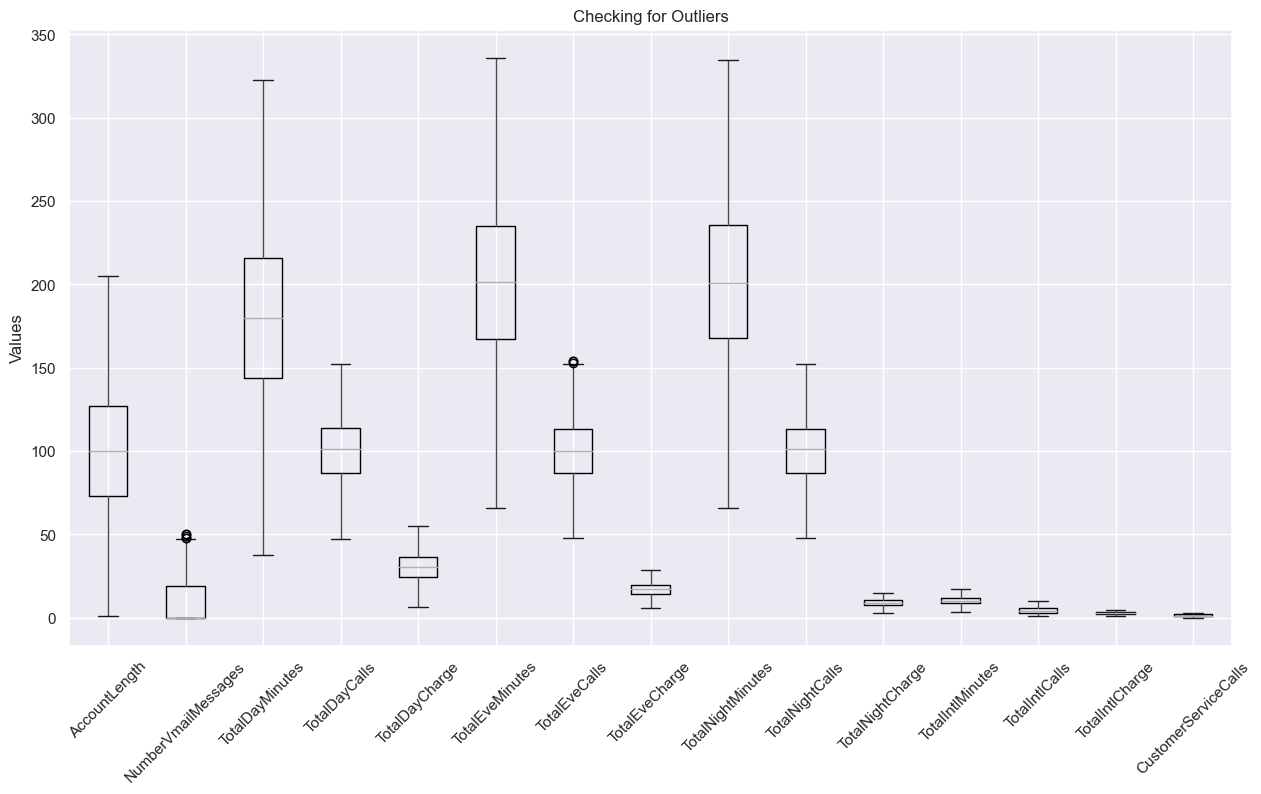

In [18]:
# Generate boxplots for cleaned columns to confirm outliers have been dropped
plt.figure(figsize=(15,8))
df2.boxplot(feature_columns, boxprops=dict(linewidth=1 ))
plt.title('Checking for Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)

                          
plt.show();

# No values outside the IQR showing outliers have been removed

The outliers are now eliminated, and the columns are cleaned; we can go ahead and start EDA. But first we save the clean dataframe to a CSV and make a copy of the same.

In [19]:
# save the clean dataframe in csv format
df2.to_csv('telco_churn_clean.csv',index=False)

In [20]:
# create a copy of the clean dataframe
df2=df2.copy(deep=True)

### 2.2 Exploratory Data Analysis

I will perform various univariate, bivariate and multivariate data analysis to better understand the data, These will include:-

+ **Summary Statistics:** To get a quick overview of the central tendency and dispersion of the dataset's distribution.
+ **Correlation Matrix:** To understand the relationships between nemerical features
+ **Histograms:** To understand numerical features distributions
+ **Class Distribution:** Analyze the distribution of the target variable churn



In [21]:
# Load the clean dataset and create a new dataframe
data = pd.read_csv('telco_churn_clean.csv')
data.head()

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
4,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(data.columns) 

print("\nThis data set consists of {} rows".format(data.shape[0])) 
print("\nThis data set consists of {} columns".format(data.shape[1]))

Index(['AccountLength', 'NumberVmailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalDayCharge', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalEveCharge', 'TotalNightMinutes', 'TotalNightCalls',
       'TotalNightCharge', 'TotalIntlMinutes', 'TotalIntlCalls',
       'TotalIntlCharge', 'CustomerServiceCalls', 'Churn',
       'InternationalPlan_yes', 'VoiceMailPlan_yes', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State

The number of columns have increased exponetially because of one-hot encoding the State columns which has many unique values

#### 2.2.1 Summary Statistics

In [23]:

# Get descriptive statistics for the non-binary nemeric columns
desc_columns = data[['AccountLength','NumberVmailMessages','TotalDayMinutes','TotalDayCalls','TotalDayCharge',
                   'TotalEveMinutes','TotalEveCalls','TotalEveCharge','TotalNightMinutes','TotalNightCalls',
                    'TotalNightCharge','TotalIntlMinutes','TotalIntlCalls','TotalIntlCharge','CustomerServiceCalls']]


desc_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountLength,2797.0,100.392206,39.329033,1.00,73.00,100.00,127.00,205.00
NumberVmailMessages,2797.0,8.131212,13.707224,0.00,0.00,0.00,19.00,50.00
TotalDayMinutes,2797.0,179.995817,52.589516,37.70,144.00,179.80,216.00,322.50
TotalDayCalls,2797.0,100.577047,19.284581,47.00,87.00,101.00,114.00,152.00
TotalDayCharge,2797.0,30.599828,8.940156,6.41,24.48,30.57,36.72,54.83
TotalEveMinutes,2797.0,201.288059,49.042830,66.00,167.20,201.40,235.10,336.00
TotalEveCalls,2797.0,100.020379,19.225656,48.00,87.00,100.00,113.00,154.00
TotalEveCharge,2797.0,17.109714,4.168704,5.61,14.21,17.12,19.98,28.56
TotalNightMinutes,2797.0,201.175366,48.827301,65.70,167.60,201.10,235.80,334.70
TotalNightCalls,2797.0,100.047193,19.052069,48.00,87.00,101.00,113.00,152.00


+ The maximum values have changed because the outliers have been removed.
+ The charactestics and patterns of usage and charges are still as described in the first summary.
+ There is significant variability in the local  minutes/calls as well as in the number voicemail messages, with significantly lower variation in charges. The network could be penalizing low usage customers with higher tariffs. 


#### 2.2.2 Correlation Matrix

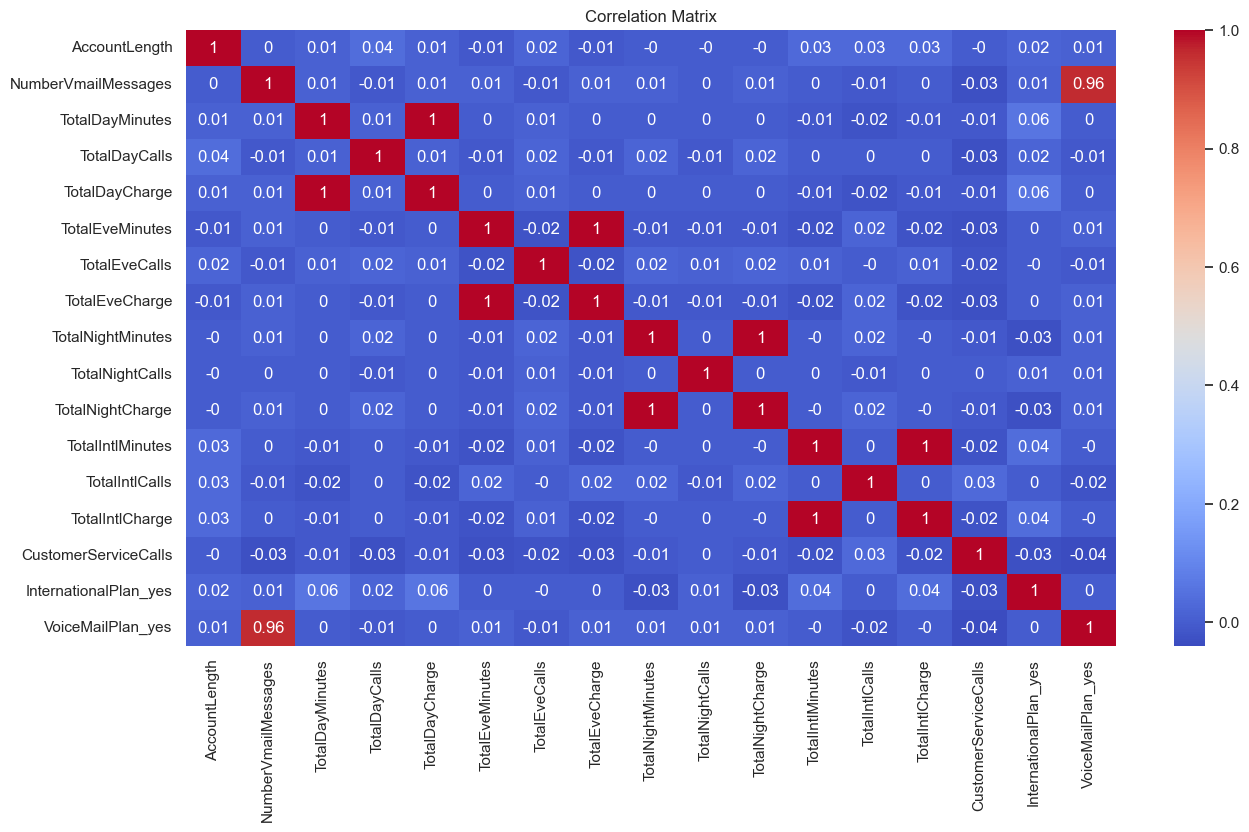

In [24]:
# Calculate the correlation matrix
corr_matrix_columns = data[['AccountLength','NumberVmailMessages','TotalDayMinutes','TotalDayCalls','TotalDayCharge',
                   'TotalEveMinutes','TotalEveCalls','TotalEveCharge','TotalNightMinutes','TotalNightCalls',
                    'TotalNightCharge','TotalIntlMinutes','TotalIntlCalls','TotalIntlCharge','CustomerServiceCalls',
                    'InternationalPlan_yes','VoiceMailPlan_yes']]
corr_matrix = corr_matrix_columns.corr().round(2)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()


+ Not surprisingly, the total (day,evening,night international) minutes have a perfect linear relationship with the total(day,evening,night,international) charges. This is because charges are based on minutes. 
+ Being on a voice plan is also very correlated to the number of voice mail minutes. 
+ This **multicollinearity** can impact model performance and interpretability. Highly correlated predictors can contribute to overfitting where the model performs well on training data but poorly on unseen data.  
+ Proposed remedy is to drop one of the correlated predictors form the model.

#### 2.2.3 Histograms

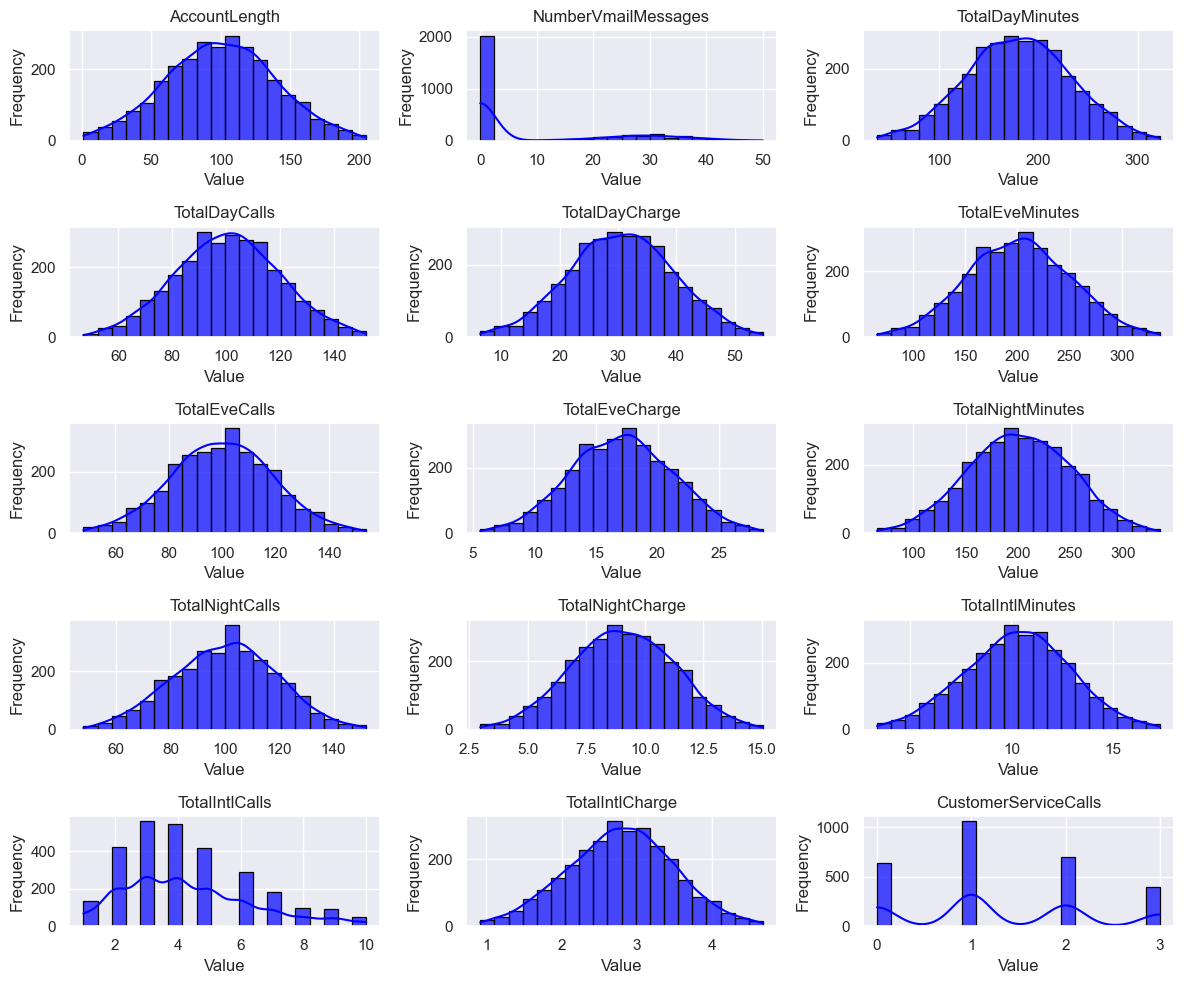

In [25]:
# List of continous columns to plot
continous_cols = data[['AccountLength','NumberVmailMessages','TotalDayMinutes','TotalDayCalls','TotalDayCharge',
                   'TotalEveMinutes','TotalEveCalls','TotalEveCharge','TotalNightMinutes','TotalNightCalls',
                    'TotalNightCharge','TotalIntlMinutes','TotalIntlCalls','TotalIntlCharge','CustomerServiceCalls']]

# Create subplots                               
plt.figure(figsize=(12,10))

for i,col in enumerate (continous_cols):
    plt.subplot(5,3,i+1)
    sns.histplot(data[col],bins=20,kde=True,color='blue',alpha=0.7,edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

+ The charts show that the number of calls and charges for local calls are approximately normally distributed; 
+ International calls distribution is right-skwed with most values with most customers in this plan making between 2 and 6 calls, and a few extending to 10; 
+ The total international charge distribution is approximately normal. 
+ The Customer Service Calls show distinct peaks at 1,2, indicating that these values are more frequent.A significant number of customers have not mae any calls to Customer Service, 
+ Number of Voice Mail Messages is highly skewed to the right, with most values concentrated around 0 and a few exceeding 20.This is because VM is an opt-in service and most customers in the network are not using the service.  

#### 2.2.4 Class distribution of the target variable

In [26]:
# Check the value counts of the target variable

print(data['Churn'].value_counts())
print(data['Churn'].value_counts(normalize=True))

Churn
0    2493
1     304
Name: count, dtype: int64
Churn
0    0.891312
1    0.108688
Name: proportion, dtype: float64


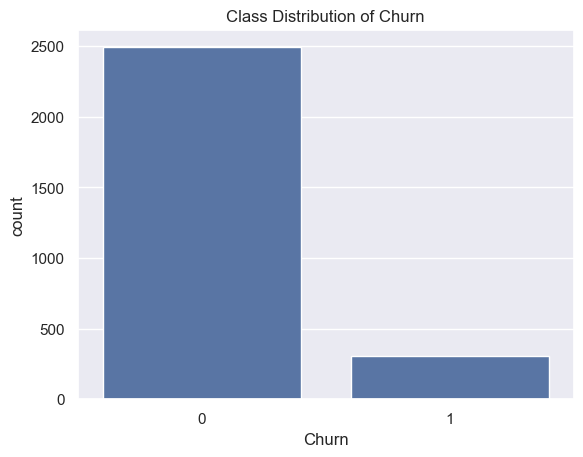

In [27]:
# Plot the classes
sns.countplot(x='Churn', data=data)
plt.title('Class Distribution of Churn')
plt.show()


The output indicates that 89% of the customers did not leave while 11% left. This is significant class imbalance. This can significantly affect impact the reliability of the model in the following ways:-
+ **Bias:** A model trained on imbalanced data may become biased biased toward the majority class. The bias may lead to a high accuracy score, but fail to correctly predict the minority class.
+ **Poor Performance on Minority Class:** Where detecting the minority class is of critical class, like in our case, the model may have poor performance in detecting the minority class i.e. incorrectly fail to predict churn.

I will address the class problem using **SMOTE** (Synthetic Minority Over-Sampling Technique) an oversampling technique that increases the number of instances in the minority class during the modeling process below.

### 4.0 Modeling

In this section I will follow a model iteration plan that addresses class imbalance and leverages feature importance and hyperparameters tuning. The following is a step by step plan to build and improve the model, starting with a baseline logistic model and incorporating SMOTE for oversampling, Random Forest for feature selection,and GridSearchCV for hyperparameter tuning:-

+ **Data Preparation:** In this section, I will prepare the data for modeling. Since I have alredy handled data cleaning and one-hot encoding, I will address multicollinearity. I will use the correlation matrix in section 2.2.2 above and remove highly correlated features.
+ **Baseline Logistic Regression Model:** I will split the data into training and test sets, train the logistic regression model on the training data and evaluate the baseline model using appropriate metrics.
+ **Handle Class Imbalance:** I will use **SMOTE** to oversample the minority class in the training set. I will re-train the model on the oversampled training data and evaluate the model on the original test set. I will compare the performance metrics before and after SMOTE application.
+ **Feature Selection:** I will use **Random Forest** to calculate feature importances and identify and retain the most important features. I will then retrain the model with these features and compare the results with those obtained above.
+ **Cross-Validation:** I will use cross-validation to ensure the model's performance is consistent and not dependent on a specific train-test split.
+ **Hyperparameter Tuning:** I will use **GridSearchCV** to find the optimal hyperparameters for the logistic regression model, and may include regularization (L1/L2) to handle overfitting. I will re-train the model with optimal hyperparameters and optimal features obtained in feature selection and evaluate and compare
performance metrics with previous iterations.
+ **Use other Modeling Algorithms**: I will train a different model algorithm - a hyperparameter pruned Decision Tree Model - and compare it's performance with the Hyperparameter tuned logistic regression 
+ **Final Model Selection:** I will select the model with the best performance based on validation metrics, Interpret this final model's results, and generate a report on model performance, feature importance and the handling of class imbalance.

### 4.1 Data Preparation
In this section:
+ I will use the correlation heat map to remove highly correlated features.
+ Split the data into train and test sets
+ Standardize the data for modeling

In [28]:
# Making a copy of the DataFrame before we clean
data1 = data.copy(deep=True)
data1

,AccountLength,NumberVmailMessages,TotalDayMinutes,TotalDayCalls,TotalDayCharge,TotalEveMinutes,TotalEveCalls,TotalEveCharge,TotalNightMinutes,TotalNightCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,0,0
4,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,0,0,0,0
2793,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,0,0,0,0,1,0
2794,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,0,0,0,0
2795,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,0,0,0


#### 4.1.1 Remove Correlated Columns

Index(['AccountLength', 'TotalDayMinutes', 'TotalDayCalls', 'TotalEveMinutes',
       'TotalEveCalls', 'TotalNightMinutes', 'TotalNightCalls',
       'TotalIntlMinutes', 'TotalIntlCalls', 'CustomerServiceCalls',
       'InternationalPlan_yes', 'VoiceMailPlan_yes'],
      dtype='object')


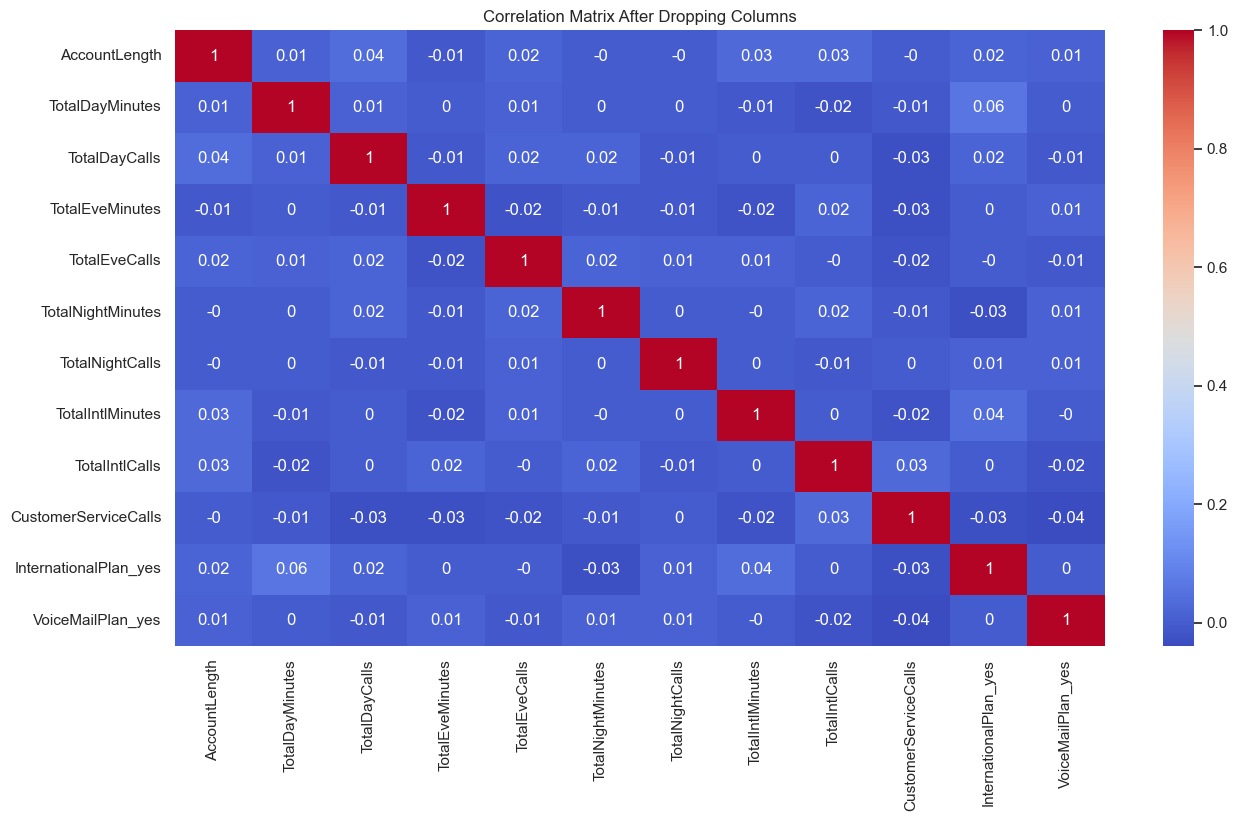

In [29]:
# List of columns to drop
col_to_drop = ['NumberVmailMessages', 'TotalDayCharge', 'TotalEveCharge', 'TotalNightCharge', 'TotalIntlCharge']

# Drop the columns from the DataFrame
corr_df = corr_matrix_columns.drop(columns=col_to_drop)

# Print the remaining columns in the DataFrame
print(corr_df.columns)

# Confirm multicollinearity as been eliminated
# Visualize the correlation matrix
corr_matrix1 = corr_df.corr().round(2)

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Dropping Columns')
plt.show()

We no longer have features that are highly correlated and we can proceed to create the baseline logistic regression model.

#### 4.1.2 Standardize the features columns

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data1 into X an y
y = data1['Churn']
X = data1.drop(columns=['Churn','NumberVmailMessages', 'TotalDayCharge', 'TotalEveCharge', 'TotalNightCharge', 
                        'TotalIntlCharge'],axis=1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Intitialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data 
X_train_standardized = scaler.fit_transform(X_train) 
X_test_standardized = scaler.transform(X_test)

# Retain feature names and convert back to DataFrame
X_train = pd.DataFrame(X_train_standardized, columns=X_train.columns)
X_test = pd.DataFrame(X_test_standardized,columns=X_test.columns)

In [31]:
# Display first five columns of the Standardized X_train
X_train.head()

,AccountLength,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,-0.260348,-1.953549,1.068323,1.796482,-1.419285,0.743572,-0.583165,0.180406,-0.642563,-1.321341,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
1,-2.030083,-0.876027,-0.348210,0.059342,0.042856,-0.950225,-1.155999,1.000783,1.292046,1.772279,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
2,-0.542480,-2.439006,-2.027065,-0.005522,-0.688215,-1.113011,1.083261,-2.397923,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
3,-0.234700,-0.375340,0.438753,1.082977,2.183849,-2.440025,-1.416378,-0.093053,-0.158911,-1.321341,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
4,1.227255,1.259981,2.589785,-1.696041,1.974972,0.725026,-0.479013,1.899292,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,5.462439,-0.142961


In [32]:
# Display first five columns of the Standardized X_test
X_test.head()

,AccountLength,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,1.175958,0.037774,-0.977781,-0.567002,-0.531557,0.632300,-0.583165,-0.093053,-0.158911,0.741072,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,6.994896
1,0.303915,-0.192580,0.071503,1.952561,0.878366,-0.125993,0.510427,-0.210250,0.324741,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
2,-0.362942,-0.712304,-1.502423,-0.960240,-0.270460,0.201639,-0.479013,-0.835299,0.324741,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
3,-0.003865,0.664107,1.383109,-0.522408,-0.949311,0.131579,-0.010331,-0.561840,-0.642563,-0.290134,...,-0.134019,-0.132164,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961
4,0.150025,-1.133033,2.170072,0.541768,2.027191,-0.060055,-2.041287,-0.757168,2.259351,0.741072,...,-0.134019,7.566373,-0.139448,-0.153056,-0.167156,-0.14976,-0.14976,-0.159461,-0.183068,-0.142961


In [33]:
# Check the shape of the standardized X_datasets
print(f"The y_train data set consists of {y_train.shape[0]} rows")
print(f"The X_train data set consists of {X_train.shape[0]} rows")
print(f"The X_train data set consists of {X_train.shape[1]} columns\n")

print(f"The y_test data set consists of {y_test.shape[0]} rows")
print(f"The X_test data set consists of {X_test.shape[0]} rows")
print(f"The X_train data set consists of {X_test.shape[1]} columns")

The y_train data set consists of 2097 rows
The X_train data set consists of 2097 rows
The X_train data set consists of 62 columns

The y_test data set consists of 700 rows
The X_test data set consists of 700 rows
The X_train data set consists of 62 columns


Both the training and test features have been standardized in order to make the model training and evaluation more reliable and effective. The two data sets have a 75.25 split.

### 4.2 Baseline Logistic Regression Model
+ Train and evaluate a Baseline Model using Accuracy score, the AUC (Area Under the Curve) and ROC (Receiver Operator Characteristic) Curve. 
+ Accuracy is a measure of how often the model gets the predictions right; 
+ AUC evaluates the ability of the model to differentiate between classes,across all possible threshold settings. 
+ The ROC  Curve is a graph that helps us visualize how well a classification model distinguishes between 2 classes. The X-axis represents the False Positive Rate (FPR) while the Y-axis represents the True Positive Rate(TPR).
+ A good model curves up towards the top=left corner, indicating high TPR and low FPR

**The same metrics will be used for all subsequent model iterations and the results compared**

Training Accuracy: 0.64
Test Accuracy: 0.57
Train AUC: 0.89
Test AUC: 0.82


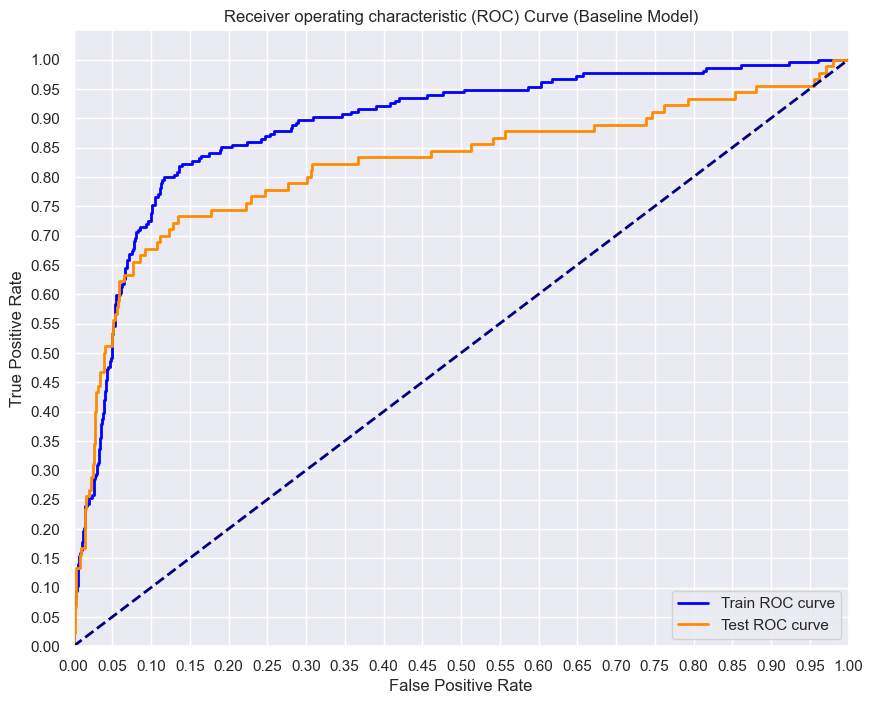

In [34]:
# import the necessary libaries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,auc,roc_auc_score

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, solver='liblinear',C=1e12)

# Fit to training data
base_log_model = logreg.fit(X_train,y_train)

# Predict on train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict (X_test)

# Get Accuracy Score 
base_train_accuracy = round(accuracy_score(y_train,y_hat_train),2)
base_test_accuracy = round(accuracy_score(y_test,y_hat_test),2)
print(f"Training Accuracy: {base_train_accuracy}")
print(f"Test Accuracy: {base_test_accuracy}")

# Create the ROC Curve for both the train and test sets

# Calculate the probability scores of each point for the train and test sets
y_train_score = base_log_model.decision_function(X_train)
y_test_score = base_log_model.decision_function(X_test)

# Calculate the fpr,tpr, and thresholds for the train and test sets
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_score)

# Print the AUC for the train and test sets
base_train_AUC = round(auc(train_fpr,train_tpr),2)
base_test_AUC = round(auc(test_fpr,test_tpr),2)
print(f"Train AUC: {base_train_AUC}")
print(f"Test AUC: {base_test_AUC}")

# Plot the ROC curves for the train and test sets

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (Baseline Model)')
plt.legend(loc='lower right')
plt.show()



#### 4.2.1 Evaluate the baseline model results 

In [35]:
# Data for the models
Metrics = ['Training Accuracy', 'Testing Accuracy', 'Train AUC', 'Test AUC']
base_scores = [base_train_accuracy,base_test_accuracy,base_train_AUC,base_test_AUC]

# Create a data Frame for the results
results_base = {'Metric':Metrics,'Score':base_scores}
base_model_metrics = pd.DataFrame(results_base)
base_model_metrics

,Metric,Score
0,Training Accuracy,0.64
1,Testing Accuracy,0.57
2,Train AUC,0.89
3,Test AUC,0.82


+ The high AUC scores compared to the lower accuracy scores suggest that while the model performs well in distinguishing between the classes, it's accuracy is low implying the model's threshold for classification might not be optimal(accuracy is calculated on a fixed threshold, often 0.5)

+ **Class Imbalance**: The significant discrepancy between accuracy and AUC scores could be due to class imbalance. The model might be predicting the majority class more often (misclassification of the minority class), leading to lower accuracy but still achieving high AUC because it gets the ranking of probabilities right.

+ **Next Steps:** Addressing class imbalance and further tuning the model should help in improving both accuracy and AUC, leading to a more robust and reliable model.

### 4.3 Handle Class Imbalance with SMOTE

#### 4.3.1 Compare the Classes Before and After SMOTE

In [36]:
# Import the library
from imblearn.over_sampling import SMOTE

# Compare the classes before and after SMOTE
print('Original class distribution: \n')
print(y.value_counts())

# Instantiate SMOTE and fit into the training set
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('SMOTE sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

Churn
0    2493
1     304
Name: count, dtype: int64
-----------------------------------------
SMOTE sample class distribution: 

Churn
0    1883
1    1883
Name: count, dtype: int64


In [37]:
# Get the shape of the resampled X_train and y_train
print(f"X_train resampled has {X_train_resampled.shape[0]} rows and {X_train_resampled.shape[1]} columns" )
print(f"y train resampled has {y_train_resampled.shape[0]} rows")

X_train resampled has 3766 rows and 62 columns
y train resampled has 3766 rows


#### 4.3.2 Train and Evaluate Logistic Regression Model on Oversampled Data

Training Accuracy: 0.78
Test Accuracy: 0.57
Train AUC: 0.92
Test AUC: 0.81


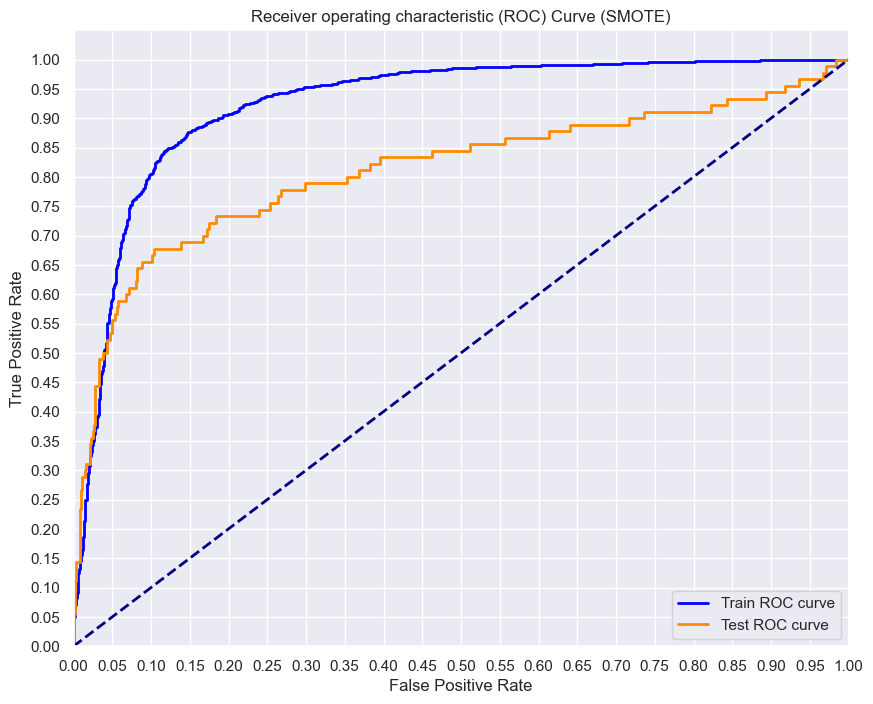

In [38]:
# Train logistic regression model on oversampled data

# Fit to training data
smote_log_model = logreg.fit(X_train_resampled,y_train_resampled)

# Predict on train and test sets
y_hat_train = logreg.predict(X_train_resampled)
y_hat_test = logreg.predict (X_test)

# Get Accuracy Score 
smote_train_accuracy = round(accuracy_score(y_train_resampled, y_hat_train),2)
smote_test_accuracy= round(accuracy_score(y_test, y_hat_test),2)
print(f"Training Accuracy: {smote_train_accuracy}")
print(f"Test Accuracy: {smote_test_accuracy}")

# Calculate the probability scores of each point for the train and test sets
y_train_score = smote_log_model.decision_function(X_train_resampled)
y_test_score = smote_log_model.decision_function(X_test)

# Calculate the fpr,tpr and thresholds for the train and test sets
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled,y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_score)

# Print the AUC for the train and test sets
smote_train_AUC = round(auc(train_fpr, train_tpr),2)
smote_test_AUC = round(auc(test_fpr, test_tpr),2)
print(f"Train AUC: {smote_train_AUC}")
print(f"Test AUC: {smote_test_AUC}")

# Plot the ROC curves for the train and test sets

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (SMOTE)')
plt.legend(loc='lower right')
plt.show()

#### 4.3.2 Compare the results of the baseline model with the oversampled SMOTE model

In [39]:
# # Data for the models
smote_scores =[smote_train_accuracy,smote_test_accuracy,smote_train_AUC,smote_test_AUC]
results_base_smote = {
    'Metric':Metrics,
    'Baseline Model': base_scores,
    'Smote Model':smote_scores}
     
# Create a DataFrame
base_smote_metrics = pd.DataFrame(results_base_smote)
base_smote_metrics


,Metric,Baseline Model,Smote Model
0,Training Accuracy,0.64,0.78
1,Testing Accuracy,0.57,0.57
2,Train AUC,0.89,0.92
3,Test AUC,0.82,0.81


+ **Training Improvement:** The model showed improved training accuracy and AUC after applying SMOTE, indicating better learning from the resampled data and improved discrimination power on the training set.

+ **Testing Performance:** The testing accuracy and the test AUC remained relatively stable, suggesting that while the model became better at learning from the training data, it did not generalize as well to the test data.

+ **Conclusion :** Potential overfitting due to the synthetic samples from SMOTE. 
+ **Next Steps:** Feature Selection, cross-validation, and Hyperparameter tuning techniques to further optimize model performance .

### 4.4 Feature Selection with Random Forest

In this section, I will try to further optimize the model through feature selection using Random Forest.

+ Train Random Forest to determine feature importances
+ Select Top Features based on importances
+ Retrain Logistic Regression Model Using Selected Features

#### 4.4.1 Train Random Forest to Determine Feature Importances

In [40]:
# Import the Random Forest Clasifier 
from sklearn.ensemble import RandomForestClassifier 

# Train a Random Forest Model to calculate feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False) 
importance_df.head(15)


,Feature,Importance
1,TotalDayMinutes,0.214362
10,InternationalPlan_yes,0.159274
3,TotalEveMinutes,0.087120
11,VoiceMailPlan_yes,0.077813
8,TotalIntlCalls,0.065558
9,CustomerServiceCalls,0.055739
5,TotalNightMinutes,0.046062
7,TotalIntlMinutes,0.041315
2,TotalDayCalls,0.035785
6,TotalNightCalls,0.033021


+ It is clear that the States have very little predictive power as they all appear below all the other features.
+ I will model top features ranging from top 5 to top 20 and compare results

#### 4.4.2 Select Top Features Based on Importances and evaluate their model results

Top 5 Features
Train Accuracy: 0.76
Test Accuracy: 0.58
Train AUC: 0.9
Test AUC: 0.83

Top 7 Features
Train Accuracy: 0.76
Test Accuracy: 0.58
Train AUC: 0.9
Test AUC: 0.83

Top 10 Features
Train Accuracy: 0.76
Test Accuracy: 0.59
Train AUC: 0.9
Test AUC: 0.83

Top 12 Features
Train Accuracy: 0.77
Test Accuracy: 0.58
Train AUC: 0.91
Test AUC: 0.83

Top 20 Features
Train Accuracy: 0.77
Test Accuracy: 0.58
Train AUC: 0.91
Test AUC: 0.83



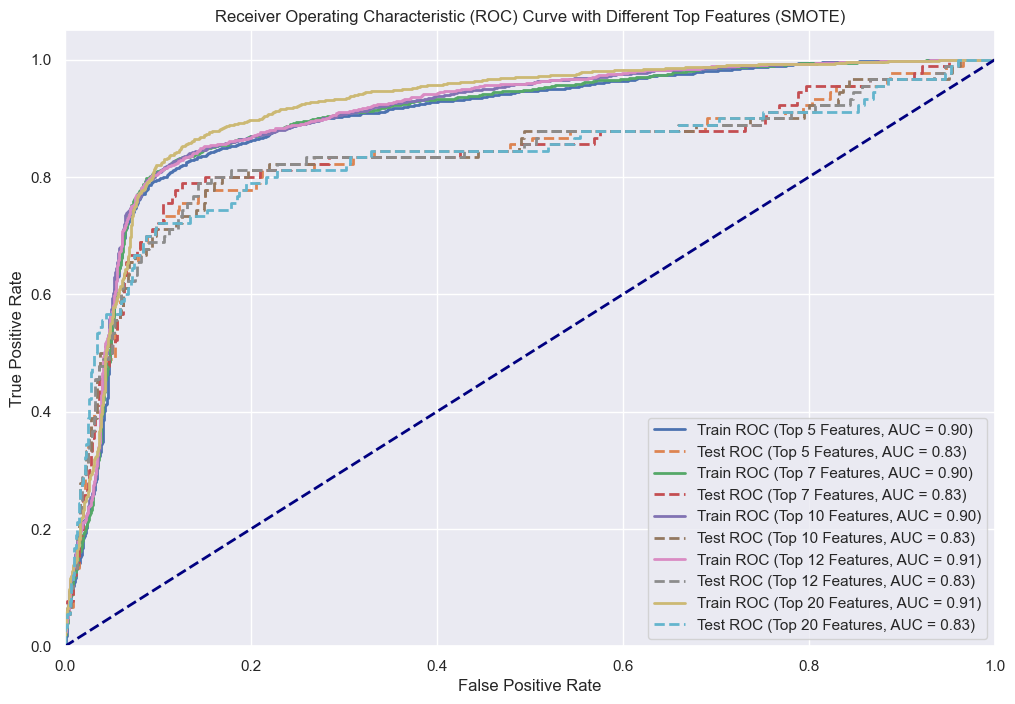

In [41]:
top_features_list = [5, 7,10,12,20]

# Define a function to evaluate models with different top features
def evaluate_model_with_top_features(top_features_count):
    top_features = importance_df['Feature'].head(top_features_count)
    X_train_top = X_train_resampled[top_features]
    X_test_top = X_test[top_features]
    
    # Train Logistic Regression model
    logreg.fit(X_train_top, y_train_resampled)
    
   # Calculate the probability scores of each point for the train and test sets
    y_train_score = logreg.decision_function(X_train_top)
    y_test_score = logreg.decision_function(X_test_top)
    
    # Calculate accuracy
    y_train_pred = logreg.predict(X_train_top)
    y_test_pred = logreg.predict(X_test_top)
    
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Calculate ROC Curve
    train_fpr, train_tpr, _ = roc_curve(y_train_resampled, y_train_score)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_score)
    
    # Calculate AUC
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    
    
    
    return {
        'top_features': top_features_count,
        'train_accuracy': round(train_accuracy,2),
        'test_accuracy': round(test_accuracy,2),
        'train_auc': round(train_auc,2),
        'test_auc': round(test_auc,2),
        'train_fpr': train_fpr,
        'train_tpr': train_tpr,
        'test_fpr': test_fpr,
        'test_tpr': test_tpr
    }

# Evaluate models
results = [evaluate_model_with_top_features(n) for n in top_features_list]

# Print results
for result in results:
    print(f"Top {result['top_features']} Features")
    print(f"Train Accuracy: {result['train_accuracy']}")
    print(f"Test Accuracy: {result['test_accuracy']}")
    print(f"Train AUC: {result['train_auc']}")
    print(f"Test AUC: {result['test_auc']}\n")

# Plot ROC Curves
plt.figure(figsize=(12, 8))
for result in results:
    plt.plot(result['train_fpr'], result['train_tpr'], lw=2, label=f"Train ROC (Top {result['top_features']} Features, AUC = {result['train_auc']:.2f})")
    plt.plot(result['test_fpr'], result['test_tpr'], lw=2, linestyle='--', label=f"Test ROC (Top {result['top_features']} Features, AUC = {result['test_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Different Top Features (SMOTE)')
plt.legend(loc='lower right')
plt.show()



#### 4.4.3 Compare the results of the features against Baseline and SMOTE models

In [42]:
# Data for the models
data = {'Metric': Metrics,
    'Baseline Model':base_scores,
    'SMOTE Model': smote_scores,
    'Top 5 Features':[0.76,0.58,0.90,0.83],
    'Top 7 Features':[0.76,0.58,0.90,0.83],
    'Top 10 Features':[0.76,0.59,0.90,0.83],
    'Top 12 Features': [0.76,0.58,0.91,0.83],  
    'Top 20 Features':[0.77,0.57,0.91,0.83]}
    

# Create a DataFrame
base_smote_features_df = pd.DataFrame(data)
base_smote_features_df


,Metric,Baseline Model,SMOTE Model,Top 5 Features,Top 7 Features,Top 10 Features,Top 12 Features,Top 20 Features
0,Training Accuracy,0.64,0.78,0.76,0.76,0.76,0.76,0.77
1,Testing Accuracy,0.57,0.57,0.58,0.58,0.59,0.58,0.57
2,Train AUC,0.89,0.92,0.90,0.90,0.90,0.91,0.91
3,Test AUC,0.82,0.81,0.83,0.83,0.83,0.83,0.83


+ **Training Accuracy and AUC:** Selected features show  no improvements from the SMOTE model
+ **Testing Performance:** Testing accuracy shows minor improvements with selected features.
+ **Optimal Feature Selection:** Top 10 to 12 features offer a balance between improving model performance and avoiding overfitting.
+ **Next Steps:** I will subset the features to the top 12 and then perform cross-validation to evaluate if the model is overfitting the training data, and Hyperparameter tuning to optimize the model.

#### 4.4.3 Subset the X_train_resampled and X_test_resampled to the 12 top features

In [43]:
# Subset the top 12 best columns 
top_features_cols = ['AccountLength', 'TotalDayMinutes', 'TotalDayCalls', 'TotalEveMinutes',
       'TotalEveCalls', 'TotalNightMinutes', 'TotalNightCalls',
       'TotalIntlMinutes', 'TotalIntlCalls', 'CustomerServiceCalls',
       'InternationalPlan_yes', 'VoiceMailPlan_yes']

X_train_resampled= X_train_resampled[top_features_cols]
X_test = X_test[top_features_cols]

print(f"This X_train_resampled with top 12 best features data set consists of {X_train_resampled.shape[0]} rows")
print(f"This X_train_resampled with top 12 best features data set consists of {X_train_resampled.shape[1]} columns\n ")

print(f"This X_test with top 12 best features data set consists of {X_test.shape[0]} rows")
print(f"This X_test with top 12 best features data set consists of {X_test.shape[1]} columns")

This X_train_resampled with top 12 best features data set consists of 3766 rows
This X_train_resampled with top 12 best features data set consists of 12 columns
 
This X_test with top 12 best features data set consists of 700 rows
This X_test with top 12 best features data set consists of 12 columns


### 4.5 Cross-Validation

I will now perform cross-validation to assess how the model generalizes to an independent dataset. I will use the SMOTE resampled data with the top 12 best features

In [44]:
# Import the necessary library
from sklearn.model_selection import cross_validate

# Define the number of folds and scoring metric
cv_folds = 5
scoring_metrics = {'accuracy':'accuracy', 'auc':'roc_auc'}

# Perform cross-validation
cv_results = cross_validate(logreg,X_train_resampled,y_train_resampled, cv=cv_folds, scoring=scoring_metrics, 
            return_train_score=True)

# Evaluate cross-validation

# Evaluate cross-validation results with rounding print("Cross-Validation Results:") 
for metric in scoring_metrics: 
    train_scores = [round(score, 2) for score in cv_results['train_' + metric]] 
    test_scores = [round(score, 2) for score in cv_results['test_' + metric]] 
    mean_train_score = round(cv_results['train_' + metric].mean(), 2) 
    mean_test_score = round(cv_results['test_' + metric].mean(), 2) 
    std_train_score = round(cv_results['train_' + metric].std(), 2) 
    std_test_score = round(cv_results['test_' + metric].std(), 2) 
    
    print(f"{metric.capitalize()} - Train: {train_scores}") 
    print(f"{metric.capitalize()} - Test: {test_scores}") 
    print(f"Mean {metric.capitalize()} - Train: {mean_train_score}") 
    print(f"Mean {metric.capitalize()} - Test: {mean_test_score}")
    print(f"Standard Deviation {metric.capitalize()} - Train: {std_train_score}")
    print(f"Standard Deviation {metric.capitalize()} - Test: {std_test_score}")
    print()

Accuracy - Train: [0.77, 0.76, 0.77, 0.77, 0.77]
Accuracy - Test: [0.75, 0.77, 0.78, 0.76, 0.76]
Mean Accuracy - Train: 0.77
Mean Accuracy - Test: 0.76
Standard Deviation Accuracy - Train: 0.0
Standard Deviation Accuracy - Test: 0.01

Auc - Train: [0.91, 0.9, 0.9, 0.91, 0.91]
Auc - Test: [0.88, 0.93, 0.91, 0.9, 0.9]
Mean Auc - Train: 0.91
Mean Auc - Test: 0.9
Standard Deviation Auc - Train: 0.0
Standard Deviation Auc - Test: 0.02



**Accuracy:** The training and testing accuracies are relatively close, indicating the model does not significantly overfit or underfit the data. However the slight testing accuracy variability indicates that the model's performance can vary based on the data split.

**AUC:** Both training and test AUC values are high, showing the model's strong ability to distinguish between classes. The train results are quite consistent across folds while the variability in testing AUC suggests the need for careful interpretation.

Overall the results show that the model performs well and generalizes effectively across different folds.

### 4.6 Hyperparameter Tuning

Hyperparameter tuning will further optimize the model and potentially reduce variability in performance. I will use GridSearchCV for tuning the following hyperparameters:

+ **max_iter:** This parameter specifies the maximum number of iterations taken for the solvers to converge. Our models so far have use 100, the default value.
+ **C:** This is the inverse of the regularization strength; smaller values specify stronger regularization. Our models have used a very high value of C=1e12 (very small regularization). The default when not specified is 1.0.
+ **solver:** This parameter determines the algorithm to use in the optimization problem. In our models, we are using 'liblinear'. The default value when not specified is 'lbfgs'.
+ **penalty:** Ths parameter specifies the norm of the penalty. Our models so far, have used the deafaul L2 norm which is the Ridge Regularization.



#### 4.6.1 Tune the model to find the best hyperparameters

In [45]:
# Import the necessary library
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = { 
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'penalty': ['l2'], 
    'fit_intercept':[True, False],
    'max_iter': [100,200,300,500,1000]}

# Initialize GridSearchCV with scoring metrics 
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, 
              cv=5, scoring=['accuracy', 'roc_auc'], refit='roc_auc', return_train_score=True)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Evaluate the results
best_params = grid_search.best_params_ 
best_score = grid_search.best_score_ 
print("Best Hyperparameters:", best_params) 
print("Best AUC Score from Cross-Validation:", best_score)

# Get results for both metrics
results_df = pd.DataFrame(grid_search.cv_results_)
accuracy_scores = results_df[results_df['mean_test_accuracy'].notnull()][['mean_test_accuracy','mean_test_roc_auc']]
print("Grid Search Results for Accuracy and AUC:") 
print(accuracy_scores)



Best Hyperparameters: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUC Score from Cross-Validation: 0.9049086550531035
Grid Search Results for Accuracy and AUC:
     mean_test_accuracy  mean_test_roc_auc
0              0.840951           0.904860
1              0.840951           0.904861
2              0.830330           0.904662
3              0.840686           0.904857
4              0.840951           0.904857
..                  ...                ...
245            0.762882           0.903147
246            0.762882           0.903149
247            0.762882           0.903149
248            0.762882           0.903147
249            0.762882           0.903146

[250 rows x 2 columns]


In [46]:
# Best Hyperparameters
best_params 

{'C': 0.1,
 'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

#### 4.6.2 Retrain the model with the best parameters

Training Accuracy: 0.84
Test Accuracy: 0.83
Train AUC: 0.91
Test AUC: 0.83


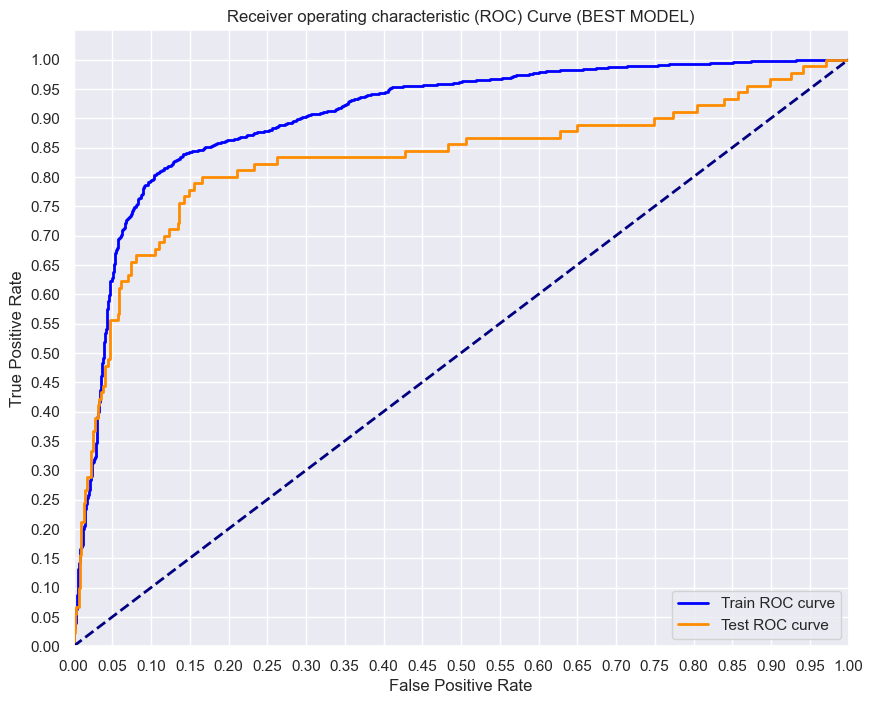

In [47]:
# Retrain the model with the best parameters
best_model = LogisticRegression(random_state=42, **best_params)
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on train and test sets
y_hat_train = best_model.predict(X_train_resampled)
y_hat_test = best_model.predict(X_test)

# Get Accuracy Score
tuned_train_accuracy = round(accuracy_score(y_train_resampled, y_hat_train), 2)
tuned_test_accuracy = round(accuracy_score(y_test, y_hat_test), 2)
print(f"Training Accuracy: {tuned_train_accuracy}")
print(f"Test Accuracy: {tuned_test_accuracy}")

# Calculate the probability scores of each point for the train and test sets
y_train_score = best_model.decision_function(X_train_resampled)
y_test_score = best_model.decision_function(X_test)

# Calculate the fpr, tpr and thresholds for the train and test sets
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

# Print the AUC for the train and test sets
tuned_train_AUC = round(auc(train_fpr, train_tpr), 2)
tuned_test_AUC = round(auc(test_fpr, test_tpr), 2)
print(f"Train AUC: {tuned_train_AUC}")
print(f"Test AUC: {tuned_test_AUC}")

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (BEST MODEL)')
plt.legend(loc='lower right')
plt.show()


#### 4.6.3 Analyze the hyperparameter Tuning Results

I will compare the Hyperparameter Tuned Model (with only the top 12 features), with the SMOTE resampled model and the Baseline Model

In [48]:
# Data for the models
tuned_scores = [tuned_train_accuracy,tuned_test_accuracy,tuned_train_AUC,tuned_test_AUC]
results_base_smote_tuned = {
    'Metric':Metrics,
    'Baseline Model': base_scores,
    'Smote Model':smote_scores,
    'Hyperparameter Tuned Model':tuned_scores
   }
three_models_analysis_df= pd.DataFrame(results_base_smote_tuned)
three_models_analysis_df

,Metric,Baseline Model,Smote Model,Hyperparameter Tuned Model
0,Training Accuracy,0.64,0.78,0.84
1,Testing Accuracy,0.57,0.57,0.83
2,Train AUC,0.89,0.92,0.91
3,Test AUC,0.82,0.81,0.83


+ All metrics improved after hyperparameter tuning, which suggests that the tuning process successfully enhanced the model's performance. 
+ Both the testing accuracy and test AUC improvements indicate better generalization to new data, reducing the risk of overfitting. 
+ The improvements are consistent accross both training and testing datasets, which is a positive sign that the model's enhancements are not just resticted to training data
+ Hyperparameter tuning has greatly enhanced the models accuracy 
+ **Next Steps** Train a different algorithm to assess the model performance against the best Logistic Regression Model- the Hyperparameter tuned Model. 

### A Different Modeling Algorithm - Decision Tree, Random Forest

In the next section I will model the following:-
+ Baseline Decision Tree
+ Hyperparameter Tuned Decision Tree
+ Random Forest Ensemble Model

These 3 model results will be compared with those of the best performing Logistic Regression Model - The Hyperparameter Tuned Model.

### 4. 7 Baseline Decision Tree

Training Accuracy: 1.0
Testing Accuracy: 0.87
Train AUC: 1.0
Test AUC: 0.79


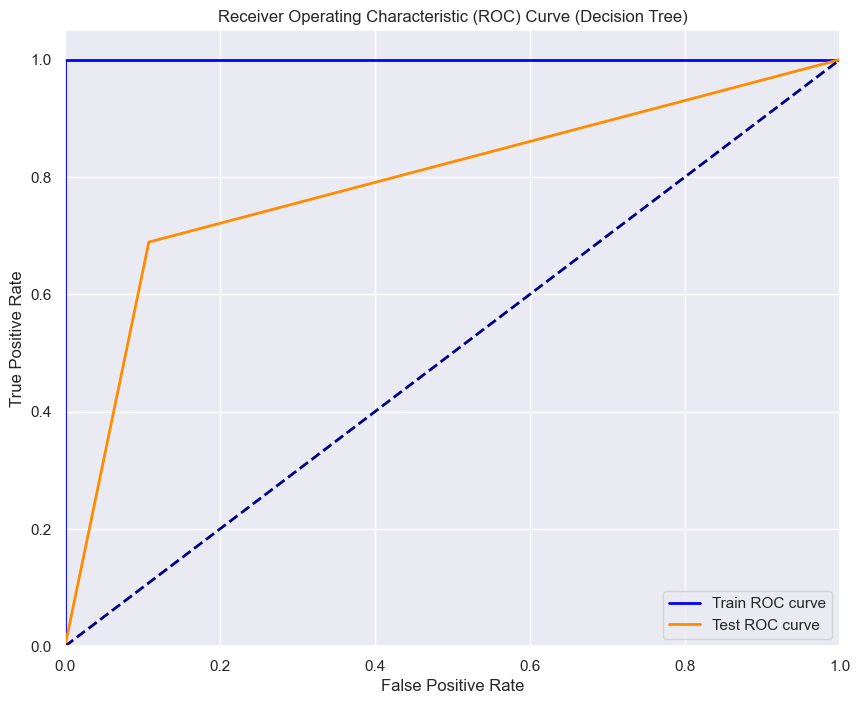

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the SMOTE-resampled training data
dt_clf.fit(X_train_resampled, y_train_resampled)

# Predict on the resampled training and testing sets
y_hat_train = dt_clf.predict(X_train_resampled)
y_hat_test = dt_clf.predict(X_test)

# Get accuracy scores
basedt_train_accuracy = round(accuracy_score(y_train_resampled, y_hat_train), 2)
basedt_test_accuracy = round(accuracy_score(y_test, y_hat_test), 2)
print('Training Accuracy:', basedt_train_accuracy)
print('Testing Accuracy:', basedt_test_accuracy)

# Calculate the probability scores for the ROC curve
y_train_prob = dt_clf.predict_proba(X_train_resampled)[:, 1]
y_test_prob = dt_clf.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
train_fpr, train_tpr, _ = roc_curve(y_train_resampled, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Calculate the AUC scores
basedt_train_AUC = round(auc(train_fpr, train_tpr), 2)
basedt_test_AUC = round(auc(test_fpr, test_tpr), 2)
print('Train AUC:', basedt_train_AUC)
print('Test AUC:', basedt_test_AUC)

# Plot the ROC curves for the train and test sets
plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
plt.legend(loc='lower right')
plt.show()


#### 4.7.1 Analyze the Baseline Decision Tree Model against the Tuned Logistics Model

In [50]:
# Data for the models
basedt_scores = [basedt_train_accuracy,basedt_test_accuracy,basedt_train_AUC,basedt_test_AUC]
results_bestlog_basedt = {
    'Metric':Metrics,
    'Best Logistic Model':tuned_scores,
    'Baseline Decision Tree Model': basedt_scores
   }
log_dt_analysis_df= pd.DataFrame(results_bestlog_basedt)
log_dt_analysis_df

,Metric,Best Logistic Model,Baseline Decision Tree Model
0,Training Accuracy,0.84,1.00
1,Testing Accuracy,0.83,0.87
2,Train AUC,0.91,1.00
3,Test AUC,0.83,0.79


+ **Overfitting:** The Baseline Decision Tree model shows signs of overfitting with perfect training metrics but much lower test metrics.

+ **Generalization:** The Hyperparameter Tuned model, while having lower training and testing accuracies, demonstrates better generalization capability. The test scores do not vary too much from the training scores.

+ **Balanced Performance:** The Hyperparameter Tuned model balances bias and variance better, resulting in more consistent and reliable performance across different datasets.

+ **Next Steps:** Prune the Decision Tree to improve performance using RandomizedSearchCV.

### 4.8 Pruned Decision Tree

I will prune the following parameters to get the best Decision Tree Model using **RandomizedSearchCV**:
+ **min_samples_split:** The minimum number of samples required to split an internal node. Default is 2.
+ **min_samples_leaf:** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. Default is 1
+ **max_depth:** The maximum depth of a tree. If None, the nodes are expanded until all leaves are pure or until leaves contain less than min_samples_split samples
+ **criterion:** This function measures the quality of a split. The default is 'gini' for the Gini impurity and 'entropy' for the information gain.

Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 10, 'max_depth': None, 'criterion': 'entropy'}
Best AUC Score from Cross-Validation: 0.9627957026752592
Training Accuracy: 0.96
Testing Accuracy: 0.91
Train AUC: 1.0
Test AUC: 0.82


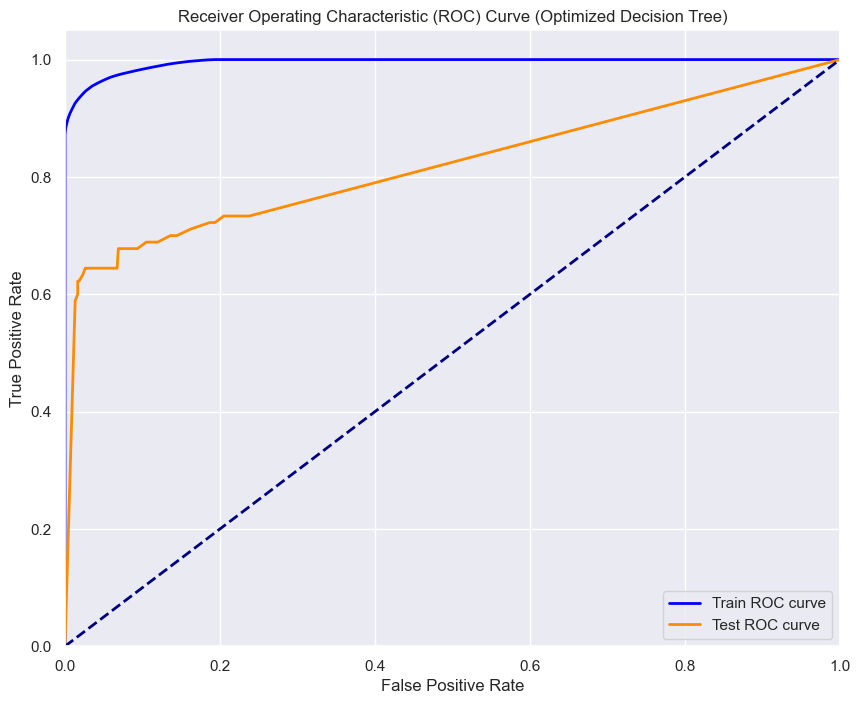

In [51]:
from sklearn.model_selection import RandomizedSearchCV
import warnings 

# Suppress warnings 
warnings.filterwarnings('ignore')

# Define the hyperparameters for tuning the Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy']}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Use RandomizedSearchCV to search over the defined parameter grid
random_search = RandomizedSearchCV(dt_clf, param_distributions=param_grid, n_iter=100, cv=5, 
                                   scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the SMOTE-resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Evaluate the Best Model
best_dt_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best AUC Score from Cross-Validation:", random_search.best_score_)

# Predict on the resampled training and testing sets
y_hat_train = best_dt_model.predict(X_train_resampled)
y_hat_test = best_dt_model.predict(X_test)

# Get accuracy scores
prunedt_train_accuracy = round(accuracy_score(y_train_resampled, y_hat_train), 2)
prunedt_test_accuracy = round(accuracy_score(y_test, y_hat_test), 2)
print('Training Accuracy:', prunedt_train_accuracy)
print('Testing Accuracy:', prunedt_test_accuracy)

# Calculate the probability scores for the ROC curve
y_train_prob = best_dt_model.predict_proba(X_train_resampled)[:, 1]
y_test_prob = best_dt_model.predict_proba(X_test)[:, 1]

# Calculate the fpr, tpr, and thresholds for the ROC curve
train_fpr, train_tpr, _ = roc_curve(y_train_resampled, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Calculate the AUC scores
prunedt_train_AUC = round(auc(train_fpr, train_tpr), 2)
prunedt_test_AUC = round(auc(test_fpr, test_tpr), 2)
print('Train AUC:', prunedt_train_AUC)
print('Test AUC:', prunedt_test_AUC)

# Plot the ROC curves for the train and test sets
plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Optimized Decision Tree)')
plt.legend(loc='lower right')
plt.show()



#### 4.8.1 Anlalyze the Pruned Decision Tree Model against the Baseline Decision Tree and Hyperparameter Tuned Logistics Model

In [52]:
# Data for the models
prunedt_scores = [prunedt_train_accuracy,prunedt_test_accuracy,prunedt_train_AUC,prunedt_test_AUC]
results_bestlog_basedt_prunedt = {
    'Metric':Metrics,
    'Best Logistic Model':tuned_scores,
    'Baseline Decision Tree Model': basedt_scores,
    'Pruned Decision Tree Model':prunedt_scores
   }
log_dt_prune_analysis_df= pd.DataFrame(results_bestlog_basedt_prunedt)
log_dt_prune_analysis_df

,Metric,Best Logistic Model,Baseline Decision Tree Model,Pruned Decision Tree Model
0,Training Accuracy,0.84,1.00,0.96
1,Testing Accuracy,0.83,0.87,0.91
2,Train AUC,0.91,1.00,1.00
3,Test AUC,0.83,0.79,0.82


+ **Baseline Decision Tree:** Exhibits overfitting with perfect training metrics but lower test performance.

+ **Pruned Decision Tree:** Balances the trade-off between bias and variance well, achieving high test accuracy and AUC, indicating better generalization.

+ **Hyperparameter Tuned Decision Tree:** Avoids overfitting, with reasonable training and test performance, making it a reliable but not the best choice.

+ **Conclusion:** Among the three models, the Pruned Decision Tree stands out with the best generalization ability and highest test performance. 
+ **Next Steps:** Perform a parameter grid search for the **Random Forest Ensemble Model** using RandomizedSearchCV

### 4.8 Random Forest Ensemble Model



I will tune the following parameters to get the best possible hyperparameters to optimize the Random Forest Ensemble Model:
+ **n_estimators:** This refers to the number of trees the model will build during training. More trees improves the model's accuracy but it can lead to overfitting and increase in computational time.
+ **min_samples_split:** The minimum number of samples required to split an internal node. Default is 2.
+ **min_samples_leaf:** The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. Default is 1
+ **max_features:** Controls the number of features considered when splitting a node. This may help with overfitting.
+ **max_depth:** The maximum depth of a tree. If None, the nodes are expanded until all leaves are pure or until leaves contain less than min_samples_split samples
+ **criterion:** This function measures the quality of a split. The default is 'gini' for the Gini impurity and 'entropy' for the information gain.


#### 4.8.1 Finding the the best parameters

In [53]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# Define the hyperparameters for tuning the Random Forest
param_grid = {
    'n_estimators': [10, 20, 100,200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7,10, 15, 20],
    'min_samples_split': [2, 5, 10,15,20],
    'min_samples_leaf': [1, 2, 4,6,8,10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV to search over the defined parameter grid
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_grid, n_iter=100, cv=5, 
                                   scoring='roc_auc', n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_resampled, y_train_resampled)

# Evaluate the Best Model
best_rf_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best AUC Score from Cross-Validation:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini'}
Best AUC Score from Cross-Validation: 0.9895408883119815


#### 4.8.2 Retrain the model with the best parameters

Training Accuracy: 1.0
Testing Accuracy: 0.92
Train AUC: 1.0
Test AUC: 0.85


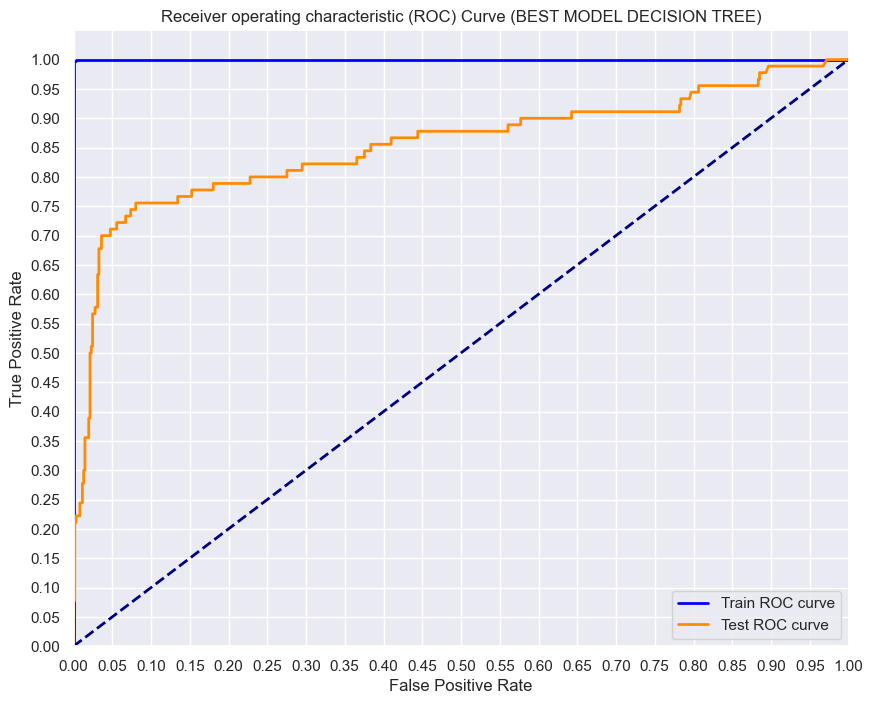

In [54]:
# Predict on train and test sets
y_hat_train = best_rf_model.predict(X_train_resampled) 
y_hat_test = best_rf_model.predict(X_test)

# Get Accuracy Score 
rf_train_accuracy = round(accuracy_score(y_train_resampled, y_hat_train), 2) 
rf_test_accuracy = round(accuracy_score(y_test, y_hat_test), 2)
print('Training Accuracy:', rf_train_accuracy)
print('Testing Accuracy:', rf_test_accuracy)

# Calculate the probability scores of each point for the train and test sets
y_train_score_tree = best_rf_model.predict_proba(X_train_resampled)[:,1]
y_train_pred = best_rf_model.predict(X_train_resampled)
y_test_score_tree = best_rf_model.predict_proba(X_test)[:,1]
y_test_pred = best_rf_model.predict(X_test)

# Calculate the fpr,tpr and thresholds for the train and test sets
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_resampled,y_train_score_tree)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test,y_test_score_tree)

# Print the AUC for the train and test sets 
rf_train_AUC = round(auc(train_fpr, train_tpr), 2) 
rf_test_AUC = round(auc(test_fpr, test_tpr), 2)
print('Train AUC:', rf_train_AUC)
print('Test AUC:', rf_test_AUC)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve (BEST MODEL DECISION TREE)')
plt.legend(loc='lower right')
plt.show()

#### 4.8.3 Analyze the Random Forest Model against Pruned Decision Tree and the Tuned Logistic Regression Model



In [55]:
# Data for the models
rf_scores = [rf_train_accuracy,rf_test_accuracy,rf_train_AUC,rf_test_AUC]
best_log_dt_rf = {
    'Metric':Metrics,
    'Best Logistic Model':tuned_scores,
    'Pruned Decision Tree Model':prunedt_scores,
    'Random Forest Ensemble Model':rf_scores
   }
log_dt_rf_analysis = pd.DataFrame(best_log_dt_rf)
log_dt_rf_analysis


,Metric,Best Logistic Model,Pruned Decision Tree Model,Random Forest Ensemble Model
0,Training Accuracy,0.84,0.96,1.00
1,Testing Accuracy,0.83,0.91,0.92
2,Train AUC,0.91,1.00,1.00
3,Test AUC,0.83,0.82,0.85


+ **Logistic Regression Hyperparameter Tuned Model:** 
    + Both training and testing accuracy are close (0.84 and 0.83), which indicates the model generalizes well to unseen data and has a balanced performance.
    + The Train and Test AUC scores (0.91 and 0.83) show that the model has good discriminative power without overfitting.
    + Logistic Regression has a consistent performance between training and testing, reflecting a balanced model.

+ **Decision Tree Pruned Model:** 
    + The Training Accuracy and Train AUC are 0.95 and 0.99, indicating the model fits the training data very well. 
    + The Testing Accuracy (0.91) is higher than the logistic model and Test AUC (0.85) is also higher. This model shows good generalizing on the test data.
    
 + **Random Forest Emsemble Model:**
 + This model has perfect scores on both The Training and Test AUC.
 + It also exhibits high accuracy and AUC, scores on the testing data, showing that it also generalizes well on unseen data, with the best test accuracy and AUC scores of the 3 models.            
 

 + **Conclusion**   
The **Random Forest Ensemble** model outperforms all the other model terms of accuracy and AUC on both the training and test sets. Though it has perfect training scores, it still has very good testing scores, which is an indication of a good generalization to unseen data.The Random Forest Ensemble model is the best model, from my analysis.

### 5.0 Summary and Recomendations

#### 5.1 Predictive power of the Data Set

The provided historical data indeed has predictive power in determing customer churn. The Hyperparameter tuned Logistic regression model, the Pruned Decision Tree Model and the Random Forest Ensemble Model have shown the ability to predict churn with high to very high accuracy and AUC scores.

Accuracy is a measure of how often the model gets the prediction right, and in this case measures how often the model correctly predicts whether a customer will churn or not. A test accuracy score of 0.93 from the best Random Forest Ensemble Model means that our model was able to predict correctly 93% of the time. 

AUC evaluates the ability of the model to differentiate between customers who churn and those who don't,across all possible threshold settings - ranging from conservative (label fewer ccustomers as churners) to more aggressive (label more customers as churners). An AUC of 0.5 means the model is no better than  random guessing while an AUC of 1.0 means the model perfectly distinguishes between churners and non-churners. The test AUC of 0.86 from the best model means that there is an 86% chance that the model will correctly rank a randomly chosen churner higher than a randomly chosen non-churner.

#### 5.2 Feature Importance
The top-12 features and their importance are detailed in the barplot below.


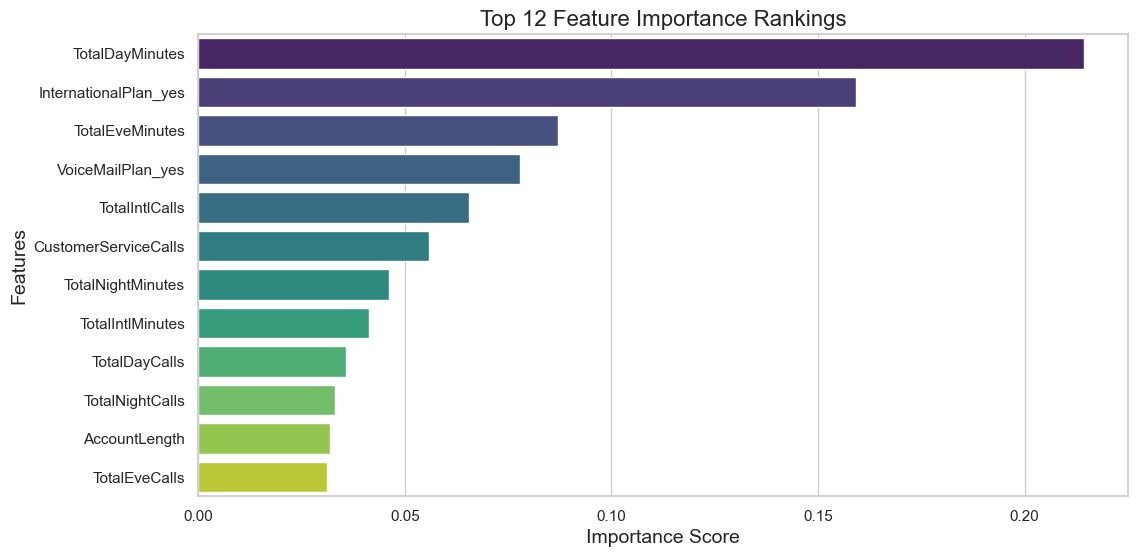

In [56]:
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(12) 

# Set the plot style
sns.set(style="whitegrid")

# Create a barplot for the top 12 features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")

# Add title and labels
plt.title('Top 12 Feature Importance Rankings', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.show()


#### 6.2.1 Actionable Insights from feature importance
+ Customers with high usage as indicated by Total Day Minutes and Total Evening Minutes are at a higher risk of churn. The Usage patterns during the day give the highest predictive power.
+ Premium customers indicated by enrolment into the International Call Plan also has significant impact on churn. Voice Mail Plan enrolment also has a strong impact.
+ Customer Service Calls also have an impact on churn, meaning a customer calling customer service more is more likely to churn.
+ The frequency or number of calls as indicated by the number of calls also has an impact, though to a lower extent that the actual time spent on the call.


#### 5.3 Model Selection and Optimization

+ **Random Forest Ensemble Model:** Given its high performance on test data, it is recommended for deployment on future company data.
+ **Feature Selection** Focus on the most impactful features identified above to reduce the complexity of the model and make it more effective and efficient. Drop less impact features like State.
+ **Model Updates** Regularly update the model with new data to maintain accuracy and adapt to any changes in customer behavior.These updates may result in a new choice of model selection.

#### 5.4 Proposed Retention Strategies based on the model results

+ **Proactive Engagement:** Regularly check in with high-usage customers and premium customers (those enrolled into International and Voice Mail plans) to address any potential issues and enhance their experience.

+ **Personalized Offers:** Provide targeted offers and discounts to high-risk customers based on their usage patterns and preferences.

+ **Customer Service Improvement:** Analyze customer service interactions to identify common pain points and address them promptly.